In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import mpld3
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

In [2]:
dir = '~/job_interviews/InsightData/project_RelativitySpace/'
dir_sim = dir+'FEA_simulations/'
dir_print = dir+'post_built_data/'
dir_sensors = dir+'sensor_data/'

%cd ~/job_interviews/InsightData/project_RelativitySpace/

/Users/fatima/job_interviews/InsightData/project_RelativitySpace


## Read the simulation dataset:

In [3]:
#pd.read_csv?
df = pd.read_csv('./FEA_simulations/data.csv', index_col=False, na_values='')
print(df.shape)
df.head()

(1889, 26)


,cooling_rate_avg-op_K_s^-1,inside_max_temp-op_K,laser_delivered_power_J_m^-2_s^-1,laser_diameter_mm,laser_distace_from_wire_mm,laser_max_temp-op_K,laser_power_w,left_wall_distance_mm,meltpool_length-op_m,meltpool_width-op_m,...,travel_speed_m_s^-1,wall_height_mm,wall_length_before_meltpool_mm,wall_length_mm,wire_angle_degree,wire_feed_speed_m_s^-1,wire_interface_liquid_fraction-op,wire_length_mm,wire_radius_mm,wire_temp_K
0,NaN,NaN,5.148396e+08,2.357018,0.009404,NaN,11226.315790,2.747193,NaN,NaN,...,0.044018,49.747368,5.307018,30.140351,23.147368,0.194245,NaN,14.771930,0.643395,390.000000
1,NaN,NaN,4.519838e+10,0.159825,0.010316,NaN,4531.578947,2.237719,NaN,NaN,...,0.052614,7.642105,4.257895,22.982456,17.905263,0.234736,NaN,16.238596,0.627897,550.000000
2,115131.41,5000.0,1.460452e+10,0.377368,0.010940,5978.6626,8163.157895,2.886140,0.004815,0.001933,...,0.060474,20.442105,11.054386,10.210526,25.357895,0.422865,0.045307,5.663158,0.605278,375.263158
3,NaN,NaN,1.254735e+08,3.085789,0.009495,NaN,4689.473684,2.797368,NaN,NaN,...,0.032965,13.368421,5.808772,30.842105,21.821053,0.312014,NaN,8.287719,0.593549,355.263158
4,NaN,NaN,4.635589e+09,0.453509,0.009221,NaN,3742.105263,2.052456,NaN,NaN,...,0.053842,34.252632,10.370175,37.157895,23.273684,0.385838,NaN,18.708772,0.538257,468.947368


## Reorganize the data
Separate the dataset into: input & output data

Rename the variables

In [4]:
for col in df.columns:
#    print(col)
    if col=='cooling_rate_avg-op_K_s^-1':
        df.rename(columns={col:'cool_rate'}, inplace=True)
    if col=='inside_max_temp-op_K':
        df.rename(columns={col:'max_temp_inside'}, inplace=True)
    if col=='laser_delivered_power_J_m^-2_s^-1':
        df.rename(columns={col:'laser_power_rate'}, inplace=True)
    if col=='laser_diameter_mm':
        df.rename(columns={col:'laser_diameter'}, inplace=True)
    if col=='laser_distace_from_wire_mm':
        df.rename(columns={col:'laser-wire_dist'}, inplace=True)
    if col=='laser_max_temp-op_K':
        df.rename(columns={col:'max_temp_spot'}, inplace=True)
    if col=='laser_power_w':
        df.rename(columns={col:'laser_power'}, inplace=True)
    if col=='left_wall_distance_mm':
        df.rename(columns={col:'dist_left_wall'}, inplace=True)
    if col=='meltpool_length-op_m':
        df.rename(columns={col:'length_melt'}, inplace=True)
    if col=='meltpool_width-op_m':
        df.rename(columns={col:'width_melt'}, inplace=True)
    if col=='new_layer_height_mm':
        df.rename(columns={col:'height_new_layer'}, inplace=True)
    if col=='temp_after_meltpool_K':
        df.rename(columns={col:'temp_after'}, inplace=True)
    if col=='penetration-op_m':
        df.rename(columns={col:'penetration'}, inplace=True)
    if col=='right_wall_distance_mm':
        df.rename(columns={col:'dist_right_wall'}, inplace=True)
    if col=='temp_before_meltpool_K':
        df.rename(columns={col:'temp_before'}, inplace=True)
    if col=='time_s':
        df.rename(columns={col:'time'}, inplace=True)
    if col=='travel_speed_m_s^-1':
        df.rename(columns={col:'travel_speed'}, inplace=True)
    if col=='wall_height_mm':
        df.rename(columns={col:'wall_height'}, inplace=True)
    if col=='wall_length_before_meltpool_mm':
        df.rename(columns={col:'wall_length_before'}, inplace=True)
    if col=='wall_length_mm':
        df.rename(columns={col:'wall_length_after'}, inplace=True)
    if col=='wire_angle_degree':
        df.rename(columns={col:'wire_angle'}, inplace=True)
    if col=='wire_feed_speed_m_s^-1':
        df.rename(columns={col:'feed_speed'}, inplace=True)
    if col=='wire_interface_liquid_fraction-op':
        df.rename(columns={col:'fraction_wire_melt'}, inplace=True)
    if col=='wire_length_mm':
        df.rename(columns={col:'wire_length'}, inplace=True)
    if col=='wire_radius_mm':
        df.rename(columns={col:'wire_radius'}, inplace=True)
    if col=='wire_temp_K':
        df.rename(columns={col:'wire_temp'}, inplace=True)

df.head()

,cool_rate,max_temp_inside,laser_power_rate,laser_diameter,laser-wire_dist,max_temp_spot,laser_power,dist_left_wall,length_melt,width_melt,...,travel_speed,wall_height,wall_length_before,wall_length_after,wire_angle,feed_speed,fraction_wire_melt,wire_length,wire_radius,wire_temp
0,NaN,NaN,5.148396e+08,2.357018,0.009404,NaN,11226.315790,2.747193,NaN,NaN,...,0.044018,49.747368,5.307018,30.140351,23.147368,0.194245,NaN,14.771930,0.643395,390.000000
1,NaN,NaN,4.519838e+10,0.159825,0.010316,NaN,4531.578947,2.237719,NaN,NaN,...,0.052614,7.642105,4.257895,22.982456,17.905263,0.234736,NaN,16.238596,0.627897,550.000000
2,115131.41,5000.0,1.460452e+10,0.377368,0.010940,5978.6626,8163.157895,2.886140,0.004815,0.001933,...,0.060474,20.442105,11.054386,10.210526,25.357895,0.422865,0.045307,5.663158,0.605278,375.263158
3,NaN,NaN,1.254735e+08,3.085789,0.009495,NaN,4689.473684,2.797368,NaN,NaN,...,0.032965,13.368421,5.808772,30.842105,21.821053,0.312014,NaN,8.287719,0.593549,355.263158
4,NaN,NaN,4.635589e+09,0.453509,0.009221,NaN,3742.105263,2.052456,NaN,NaN,...,0.053842,34.252632,10.370175,37.157895,23.273684,0.385838,NaN,18.708772,0.538257,468.947368


In [5]:
#print(df.columns)

cols_in = ['time', 'laser_power', 'laser_power_rate', 'laser_diameter', 'laser-wire_dist', 'dist_left_wall', 
           'dist_right_wall', 'height_new_layer', 'temp_after', 'wall_length_before', 'wall_length_after', 
           'wire_length', 'wire_radius', 'wire_temp', 'temp_before', 'travel_speed', 'wall_height', 'wire_angle', 
           'feed_speed']

cols_out = ['cool_rate', 'max_temp_inside', 'max_temp_spot', 'length_melt', 'width_melt', 'penetration', 
            'fraction_wire_melt']

df_out = df[cols_out]
df_in = df[cols_in]

print('Useful data %:', df['cool_rate'].dropna().count()/df['time'].count())

df_out.head(3)
#df_out.tail(3)

Useful data %: 0.518263631551


,cool_rate,max_temp_inside,max_temp_spot,length_melt,width_melt,penetration,fraction_wire_melt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115131.41,5000.0,5978.6626,0.004815,0.001933,0.000879,0.045307


## Select the Useful Data:

In [6]:
df_sel = df[(df['cool_rate'] <  1.3e5) & (df['max_temp_spot'] < 8.0e4) & (df['penetration'] < 0.005) &
            (df['length_melt'] > -1e20) & (df['length_melt'] < 1e20) & (df['width_melt'] > 0) &
            (df['length_melt'] > 0) & (df['penetration'] > 0)]
df_sel = df_sel.dropna()

print('Total # datapoints: ', df['time'].count(), '; Discading NaNs: ', df['cool_rate'].dropna().count(), 
      '; Selecting realistinc values:', df_sel['time'].count(), '; % Useful data:', 
      df_sel['time'].count()/df['time'].count())
print('')

df_sel.head()

Total # datapoints:  1889 ; Discading NaNs:  979 ; Selecting realistinc values: 855 ; % Useful data: 0.452620434092



,cool_rate,max_temp_inside,laser_power_rate,laser_diameter,laser-wire_dist,max_temp_spot,laser_power,dist_left_wall,length_melt,width_melt,...,travel_speed,wall_height,wall_length_before,wall_length_after,wire_angle,feed_speed,fraction_wire_melt,wire_length,wire_radius,wire_temp
2,115131.410,5000.0000,1.460452e+10,0.377368,0.010940,5978.6626,8163.157895,2.886140,0.004815,0.001933,...,0.060474,20.442105,11.054386,10.210526,25.357895,0.422865,0.045307,5.663158,0.605278,375.263158
8,38648.191,1849.2128,5.354498e+08,2.204737,0.010947,1974.2283,10215.789470,2.716316,0.009671,0.003454,...,0.045246,16.400000,10.142105,10.631579,13.105263,0.411081,0.000000,10.371930,0.544540,453.157895
12,83318.891,5000.0000,1.023008e+10,0.486140,0.009347,5919.9004,9489.473684,2.500175,0.006670,0.002028,...,0.063175,4.442105,2.661404,19.614035,24.221053,0.373170,0.000000,6.280702,0.584334,501.578947
18,117957.950,1511.7866,6.401692e+08,1.388947,0.010232,1637.6294,4847.368421,2.434561,0.003647,0.001262,...,0.069070,19.600000,12.787719,11.614035,13.863158,0.382811,0.000000,7.592982,0.560877,543.684211
35,12885.079,3219.1543,1.782306e+09,0.790702,0.009312,3386.0747,4373.684211,2.855263,0.003770,0.002355,...,0.019211,21.452632,5.352632,17.508772,15.631579,0.117849,0.330994,19.326316,0.563809,462.631579


feed_speed


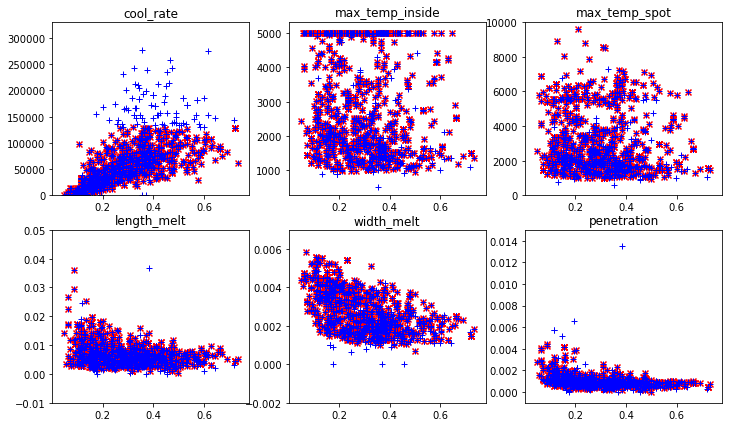

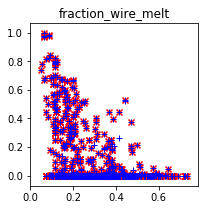

In [7]:
plt.close('all')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(12,7))
fig, ax = plt.subplots(figsize=(3,3))

n = 18
print(df_in.columns[n])
ax1.plot(df[cols_in[n]], df[cols_out[0]],'+',color='blue')
ax1.set_title(cols_out[0])
ax1.set_ylim([0,3.3e5])
ax1.scatter(df_sel[cols_in[n]], df_sel[cols_out[0]], marker='x',color='red')
ax2.plot(df[cols_in[n]], df[cols_out[1]],'+',color='blue')
ax2.set_title(cols_out[1])
ax2.scatter(df_sel[cols_in[n]], df_sel[cols_out[1]], marker='x',color='red')
ax3.plot(df[cols_in[n]], df[cols_out[2]],'+',color='blue')
ax3.set_title(cols_out[2])
ax3.set_ylim([0,1e4])
ax3.scatter(df_sel[cols_in[n]], df_sel[cols_out[2]], marker='x',color='red')
ax4.plot(df[cols_in[n]], df[cols_out[3]],'+',color='blue')
ax4.set_title(cols_out[3])
ax4.set_ylim([-0.01,0.05])
ax4.scatter(df_sel[cols_in[n]], df_sel[cols_out[3]], marker='x',color='red')
ax5.plot(df[cols_in[n]], df[cols_out[4]],'+',color='blue')
ax5.set_title(cols_out[4])
ax5.set_ylim([-2e-3,7e-3])
ax5.scatter(df_sel[cols_in[n]], df_sel[cols_out[4]], marker='x',color='red')
ax6.plot(df[cols_in[n]], df[cols_out[5]],'+',color='blue')
ax6.set_title(cols_out[5])
ax6.scatter(df_sel[cols_in[n]], df_sel[cols_out[5]], marker='x',color='red')
ax6.set_ylim([-1e-3,1.5e-2])
ax.plot(df[cols_in[n]], df[cols_out[6]],'+',color='blue')
ax.set_title(cols_out[6])
ax.scatter(df_sel[cols_in[n]], df_sel[cols_out[6]], marker='x',color='red')

plt.show(fig)
fig.tight_layout()
plt.close('all')


## Check correlation between variables:

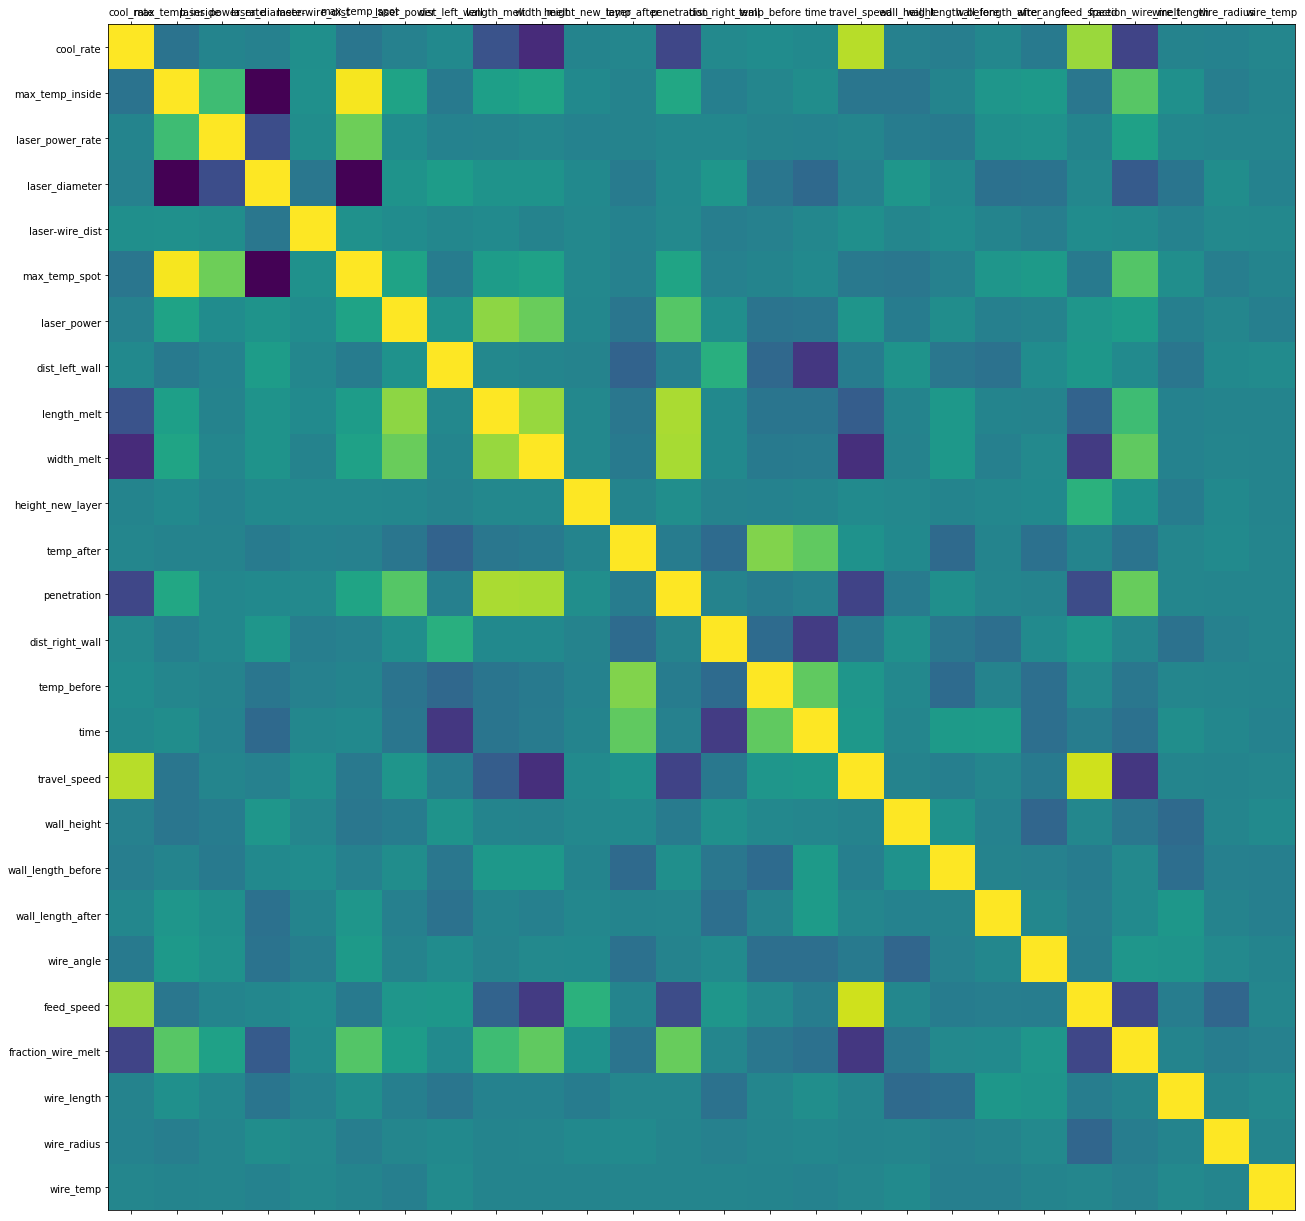

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_corr(df_sel,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df_sel.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    ax.yaxis.label.set_size(40)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    #plt.xlabel(fontsize=16, fontweight='bold')
    plt.tight_layout()
#    fig.savefig("heat_map_all.png")

mpl.style.use('seaborn-pastel')
df_sel.corr()

plt.close('all')
plot_corr(df_sel,18)
plt.show()


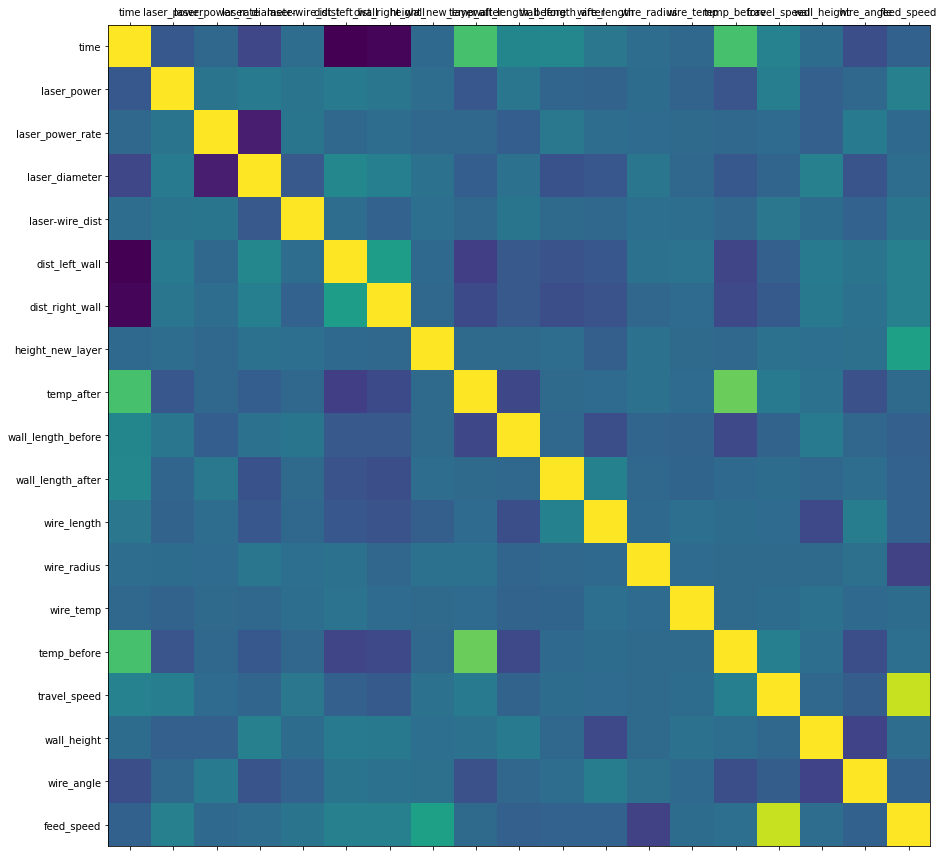

In [9]:
def plot_corr(df_sel,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df_sel[cols_in].corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    ax.yaxis.label.set_size(40)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    #plt.xlabel(fontsize=16, fontweight='bold')
    plt.tight_layout()
#    fig.savefig("heat_map_input.png")

mpl.style.use('seaborn-pastel')
df_sel[cols_in].corr()

plt.close('all')
plot_corr(df_sel,13)
plt.show()


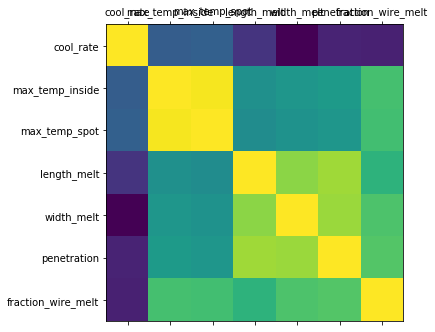

In [10]:
def plot_corr(df_sel,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df_sel[cols_out].corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    ax.yaxis.label.set_size(40)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    #plt.xlabel(fontsize=16, fontweight='bold')
    plt.tight_layout()
#    fig.savefig("heat_map_output.png")

mpl.style.use('seaborn-pastel')
df_sel[cols_out].corr()

plt.close('all')
plot_corr(df_sel,6)
plt.show()


### Histogram of input variables:

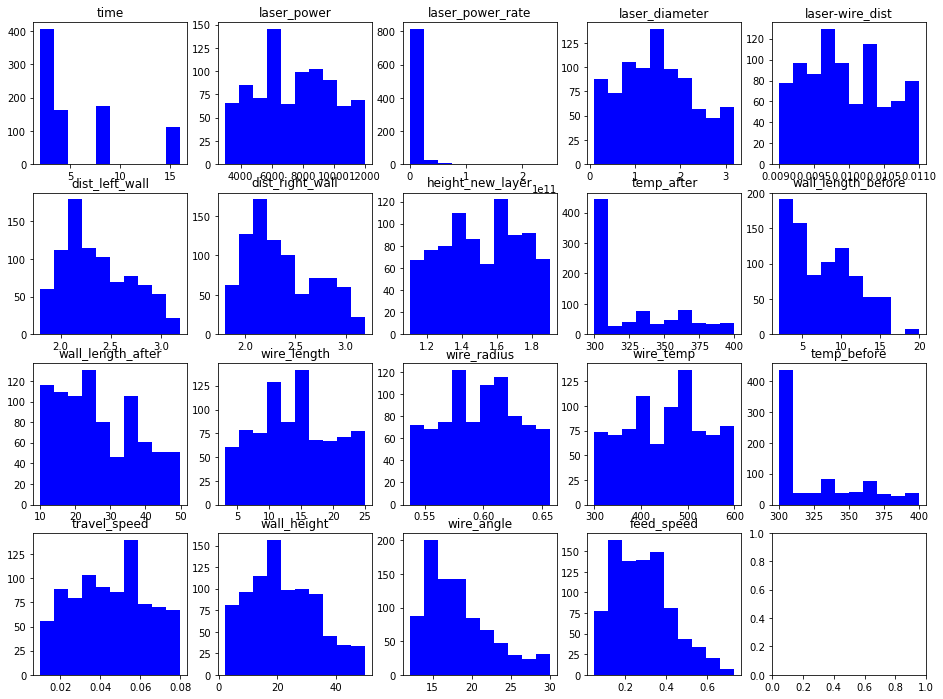

In [11]:
#Plot histogram of input (dependent) variables:
plt.close('all')
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) , (ax11, ax12, ax13, ax14, ax15),
     (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(4,5,figsize=(16,12))

ax1.hist(df_sel[cols_in[0]],color='blue')
ax1.set_title(cols_in[0])
ax2.hist(df_sel[cols_in[1]],color='blue')
ax2.set_title(cols_in[1])
ax3.hist(df_sel[cols_in[2]],color='blue')
ax3.set_title(cols_in[2])
ax4.hist(df_sel[cols_in[3]],color='blue')
ax4.set_title(cols_in[3])
ax5.hist(df_sel[cols_in[4]],color='blue')
ax5.set_title(cols_in[4])
ax6.hist(df_sel[cols_in[5]],color='blue')
ax6.set_title(cols_in[5])
ax7.hist(df_sel[cols_in[6]],color='blue')
ax7.set_title(cols_in[6])
ax8.hist(df_sel[cols_in[7]],color='blue')
ax8.set_title(cols_in[7])
ax9.hist(df_sel[cols_in[8]],color='blue')
ax9.set_title(cols_in[8])
ax10.hist(df_sel[cols_in[9]], color='blue')
ax10.set_title(cols_in[9])
ax11.hist(df_sel[cols_in[10]],color='blue')
ax11.set_title(cols_in[10])
ax12.hist(df_sel[cols_in[11]],color='blue')
ax12.set_title(cols_in[11])
ax13.hist(df_sel[cols_in[12]],color='blue')
ax13.set_title(cols_in[12])
ax14.hist(df_sel[cols_in[13]],color='blue')
ax14.set_title(cols_in[13])
ax15.hist(df_sel[cols_in[14]],color='blue')
ax15.set_title(cols_in[14])
ax16.hist(df_sel[cols_in[15]], color='blue')
ax16.set_title(cols_in[15])
ax17.hist(df_sel[cols_in[16]], color='blue')
ax17.set_title(cols_in[16])
ax18.hist(df_sel[cols_in[17]], color='blue')
ax18.set_title(cols_in[17])
ax19.hist(df_sel[cols_in[18]], color='blue')
ax19.set_title(cols_in[18])

plt.show(fig)
fig.tight_layout()
plt.close('all')

#fig.savefig('histogram_inputs.jpg')


### Histogram of output variables:

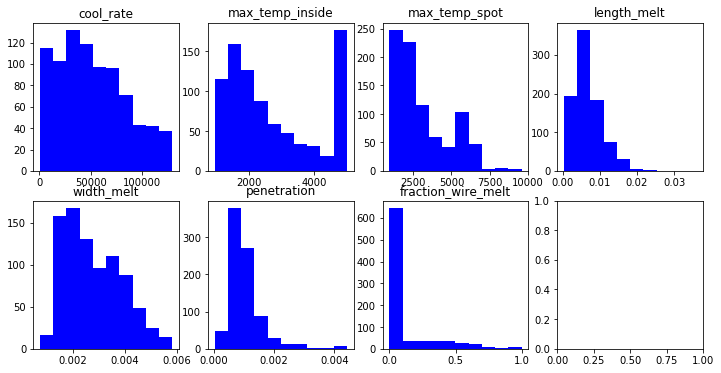

In [12]:
#Plot histogram of output (independent) variables:
plt.close('all')
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4,figsize=(12,6))

ax1.hist(df_sel[cols_out[0]],color='blue')
ax1.set_title(cols_out[0])
ax2.hist(df_sel[cols_out[1]],color='blue')
ax2.set_title(cols_out[1])
ax3.hist(df_sel[cols_out[2]],color='blue')
ax3.set_title(cols_out[2])
ax4.hist(df_sel[cols_out[3]],color='blue')
ax4.set_title(cols_out[3])
ax5.hist(df_sel[cols_out[4]],color='blue')
ax5.set_title(cols_out[4])
ax6.hist(df_sel[cols_out[5]],color='blue')
ax6.set_title(cols_out[5])
ax7.hist(df_sel[cols_out[6]],color='blue')
ax7.set_title(cols_out[6])

plt.show(fig)
fig.tight_layout()
plt.close('all')

#fig.savefig('histogram_outputs.jpg')

## Normalize the dataset:

Normalize the dataset such that the median in 0.0 and the variance is 1.0

Use the same noramalization method for all data

In [13]:
def normalize(data):
    """ Given the flare data, we normalize each feature by subtrating the median and 
    dividing by the standard deviation of each feature. """
    data = np.array(data)
    n_elements, n_features = data.shape
    for j in range(n_features):
        standard_deviation_of_this_feature = np.std(data[:,j])
        median_of_this_feature = np.median(data[:,j])
        for i in range(n_elements):
            data[i,j] = (data[i,j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return data

In [14]:
X_std = normalize(df_sel[cols_in])
y_std = normalize(df_sel[cols_out])
df_X_std = pd.DataFrame(data=X_std, columns=cols_in)
df_y_std = pd.DataFrame(data=y_std, columns=cols_out)


## Calculate the covariance and correlation matrices:

In [15]:
# Eigendecomposition of the covariance matrix after standardizing the data.
cov_mat = np.cov(df_sel[cols_in].T)
cov_mat = np.cov(df_X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

# Eigendecomposition of the correlation matrix.
cor_mat1 = np.corrcoef(df_sel[cols_in].T)
cor_mat1 = np.corrcoef(df_X_std.T)
eig_vals1, eig_vecs1 = np.linalg.eig(cor_mat1)
#print('Eigenvectors \n%s' %eig_vecs1)
print('\nEigenvalues \n%s' %eig_vals1)

# Eigendecomposition of the correlation matrix after standardizing the data.
cor_mat2 = np.corrcoef(df_sel[cols_in].T)
cor_mat2 = np.corrcoef(df_X_std.T)
eig_vals2, eig_vecs2 = np.linalg.eig(cor_mat2)
#print('Eigenvectors \n%s' %eig_vecs2)
print('\nEigenvalues \n%s' %eig_vals2)

print("The two approaches yield the same eigenvectors and eigenvalue pairs")



Eigenvalues 
[ 2.85918501  2.0596407   1.72299195  0.01674438  0.22871142  1.43011135
  0.34520737  0.49512996  1.24012565  0.58478938  0.6527218   0.69854986
  0.74919351  0.90165127  0.86153539  0.98418366  1.09123229  1.04791381
  1.05262948]

Eigenvalues 
[ 2.85584093  2.05723176  1.72097675  0.0167248   0.22844393  1.42843871
  0.34480362  0.49455086  1.23867521  0.58410541  0.65195838  0.69773284
  0.74831726  0.90059671  0.86052775  0.98303257  1.089956    1.04668818
  1.05139833]

Eigenvalues 
[ 2.85584093  2.05723176  1.72097675  0.0167248   0.22844393  1.42843871
  0.34480362  0.49455086  1.23867521  0.58410541  0.65195838  0.69773284
  0.74831726  0.90059671  0.86052775  0.98303257  1.089956    1.04668818
  1.05139833]
The two approaches yield the same eigenvectors and eigenvalue pairs


In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals2[i]), eig_vecs2[:,i]) for i in range(len(eig_vals))]
#print('Eigenvalues in real order:')
#for i in eig_pairs:
#    print(i[0])

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True, )

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
#for i in eig_pairs:
#    print(i[0])
    
idx_cols = sorted(range(len(eig_pairs)), key=lambda x:eig_pairs[x])
cols_sorted = df_X_std.columns[idx_cols]
cols_sorted = np.array(cols_in)[idx_cols]
print('Order of variables:', (cols_sorted))

Eigenvalues in descending order:
Order of variables: ['feed_speed' 'wire_angle' 'wall_height' 'travel_speed' 'temp_before'
 'wire_temp' 'wire_radius' 'wire_length' 'wall_length_after'
 'wall_length_before' 'temp_after' 'height_new_layer' 'dist_right_wall'
 'dist_left_wall' 'laser-wire_dist' 'laser_diameter' 'laser_power_rate'
 'laser_power' 'time']


After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” 

A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

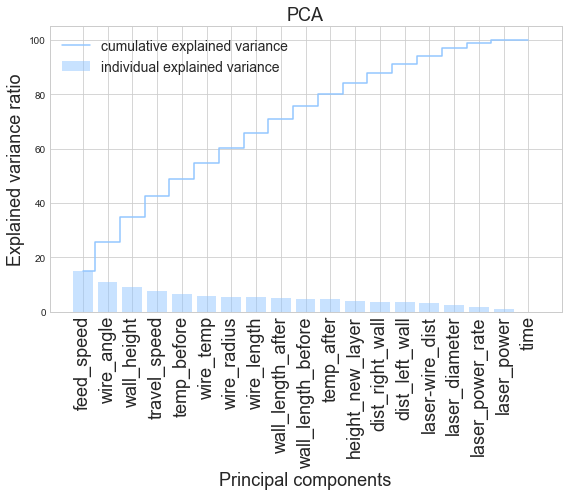

In [17]:
tot = sum(eig_vals2)
var_exp = [(i / tot)*100 for i in sorted(eig_vals2, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    #plt.figure(figsize=(8,10))
    fig = plt.figure(figsize=(8,7))
    
    plt.bar(range(len(cols_in)), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(len(cols_in)), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.xticks(range(len(cols_in)), cols_sorted, rotation='vertical', fontsize=18)
    plt.title('PCA', fontsize=18)
    plt.ylabel('Explained variance ratio', fontsize=18)
    plt.xlabel('Principal components', fontsize=18)
    plt.legend(loc='best', fontsize=14)
    plt.tight_layout()
    plt.show()
    #fig.savefig('Variance_ratio_corr_matrix.jpg')
    

## Principal Component Analysis (PCA)

Identify a smaller number of uncorrelated variables, called "principal components", from a large set of data. The goal is to explain the maximum amount of variance with the fewest number of principal components:

Careful!: It assumes that there is a linear correlation between variables

In [18]:
from sklearn.decomposition import PCA

#print(X_train.shape)
pca_model = PCA()
pca_model2 = PCA(n_components=5)
pca_model3 = PCA(svd_solver='full')
pca_model4 = PCA(n_components=18, svd_solver='arpack')

pca = pca_model.fit(df_X_std)
pca2 = pca_model2.fit(df_X_std)
pca3 = pca_model3.fit(df_X_std)
pca4 = pca_model4.fit(df_X_std)

Y_pca = pca.fit_transform(df_X_std)
pca_var = pca.explained_variance_
pca_var_ind = pca.explained_variance_ratio_
#pca_var_ind = pca2.explained_variance_ratio_
pca_var_acc = np.cumsum(pca_var_ind)

#print(pca_var)
#print(pca_var_ind)

#pca_var1 = pca.explained_variance_ratio_
#pca_var_acc1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(pca_var1, pca_var_acc1)


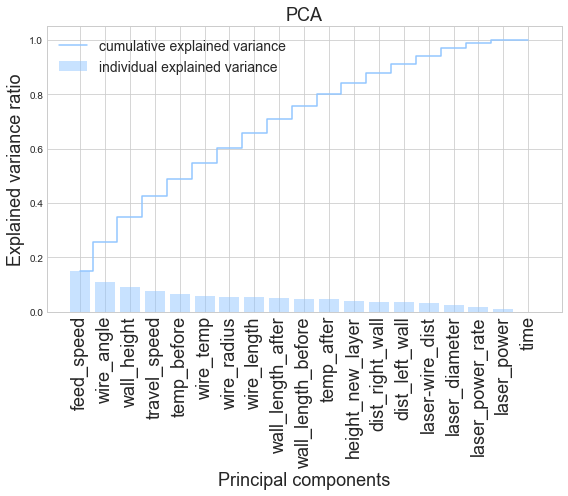

In [19]:
idx_cols = sorted(range(len(cols_in)), key=lambda x:pca.explained_variance_[x])
cols_sorted = np.array(cols_in)[idx_cols]

# Plot the results from above
with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(8,7))
    
    plt.bar(range(pca.n_components_), pca_var_ind, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(pca.n_components_), pca_var_acc, where='mid', label='cumulative explained variance')
    plt.xticks(range(pca.n_components_), cols_sorted, rotation='vertical', fontsize=18)
    plt.title('PCA', fontsize=18)
    plt.ylabel('Explained variance ratio', fontsize=18)
    plt.xlabel('Principal components', fontsize=18)
    plt.ylim((0,1.05))
    plt.legend(loc='best', fontsize=14)
    plt.tight_layout()
    plt.tight_layout()
    plt.show()
    #fig.savefig('PCA_variance_ratio.jpg')